# CE9010: Introduction to Data Science (Project)
# Semester 2 2017/18
## Group 1: Jazlyn Chuah, Zachary, Teo Hwee Leng

### Step 1: Identifying a data problem to solve
With many data science projects available, we decided to work on a popoluar dataset - Boston Housing Data Set. 
It is a fairly small data set which allows us to attempt any technique without worrying about our laptop’s memory issue. This is a regression problem. The objective of our project is to predict the housing prices in Boston as accurately as possible, given the various features. 

We decided to retrieve our dataset from the UCI Machine Learning Repository, where the required dataset is publicly available.

### Step 2: Data acquisition
To acquire the data, we decided to use the following modules: requests and pandas. This would mean that users will be able to obtain the data set while running the codes instead of having to download the csv file in advance.

In [1]:
# Importing all the necessary libraries
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Special matplotlib argument for improved plots
from matplotlib import rcParams

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 8)})

In [2]:
# Pulling the data
# Using requests to retrieve the data from the website
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

# Splitting the data in the file
data = r.text.replace('\n', ' ').split(" ")
data = list(filter(lambda x: x != '', data))

# Putting the data under the different columns.
feats = ["CRIM","ZN","INDUS","CHAS","NOX","RM", "AGE","DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"] 
df = pd.DataFrame(columns=feats)
num = int(len(data)/14)
for i in range(num):
    df.loc[i] = data[i*14:i*14+14]
    
# Save the new data file in csv format
df.to_csv("housing.csv", index=False)

In [3]:
# Read into dataframe
data = pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


To have an idea of how big a data we are working with, we print the shape of the data.

In [4]:
print(data.shape)

(506, 14)


We see that there are 506 rows and 14 coloumns. This means that there are 506 observations and 13 features, with the last column being the target variable.

The 14 features are:
'CRIM'    - per capital crime rate per town <br>
'ZN'      - proportion of residential land zoned for lots over 25,000 sq. ft. <br>
'INDUS'   - proportion of non-retail business acres per town <br>
'CHAS'    - Charles River dummy variable (=1 if tract bounds river; 0 otherwise) <br>
'NOX'     - nitric oxides concentration (parts per 10 million) <br>
'RM'      - average number of rooms per dwelling <br>
'AGE'     - proportion of owner-occupied units built prior to 1940 <br>
'DIS'     - weighted distances to five Boston employment centres <br>
'RAD'     - index of accessibility to radical highways <br>
'TAX'     - full-value property-tax rate per \$10,000 <br>
'PTRATIO' - pupil-teacher ratio by town <br>
'B'       - $1000 (Bk - 0.63)^2$ where Bk is the proportion of blacks by town <br>
'LSTAT'   - percentage lower status of the population <br>
'MEDV'    - Median value of owner-occupied homes in \$1000's <br>

### Step 3 & 4: Data exploration & Pre-processing

Firstly, we check for any missing values so that we can fill in any missing values with the mean/median. But in this case, as there are no missing values, no pre-processing of the data is required.

In [5]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Next, we want to analyse the target column: 'MEDV'. We want to know the distribution for the median value of owner-occupied homes in \$1000's

In [6]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

For us to get a better understanding of the 'MEDV' variable, we use Seaborn to visualise the distribution of the 'MEDV' variable. The distplot() function in the seaborn module will draw a histogram by default and we can have a look at a univariate distribution of our data.

/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


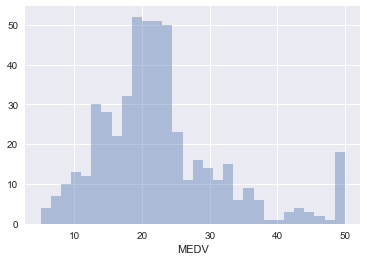

In [7]:
sns.distplot(data['MEDV'], bins=30, kde=False)
plt.show()

Next, we want to visualise the correlation between all the variables using a heatmap, which can also be found in the seaborn module.

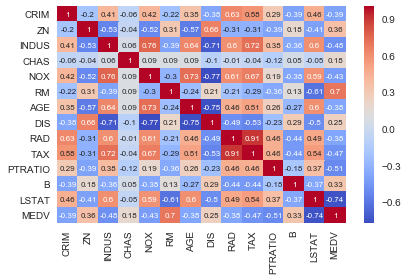

In [8]:
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

From the heatmap generated, we can see that the three variables with the strongest correlation to the target 'MEDV' are 'LSTAT', 'RM' and 'PTRATIO'.

The heatmap can also be used to check for correlation between variables so that multicollinearity is not included into the linear regression. For example, both 'RAD' and 'TAX' have a high correlation value (0.91), hence they should not be used in a linear regression at the same time.

Next, we try to view the relationship between each variable against the target variable 'MEDV'.

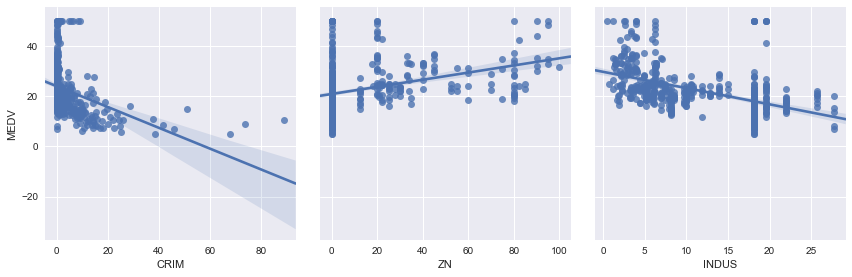

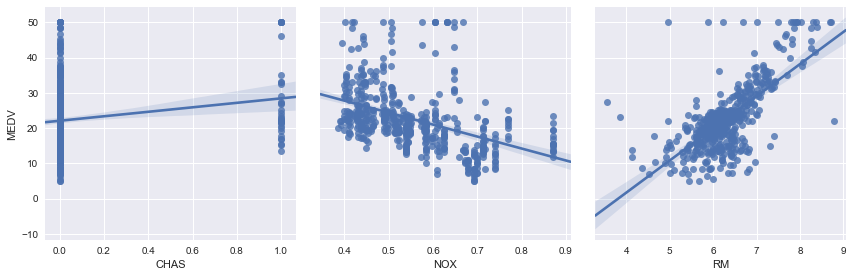

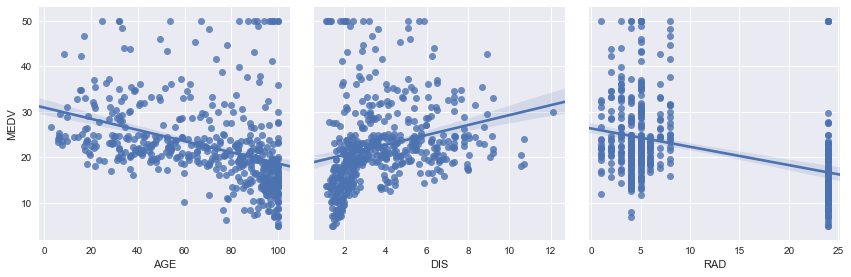

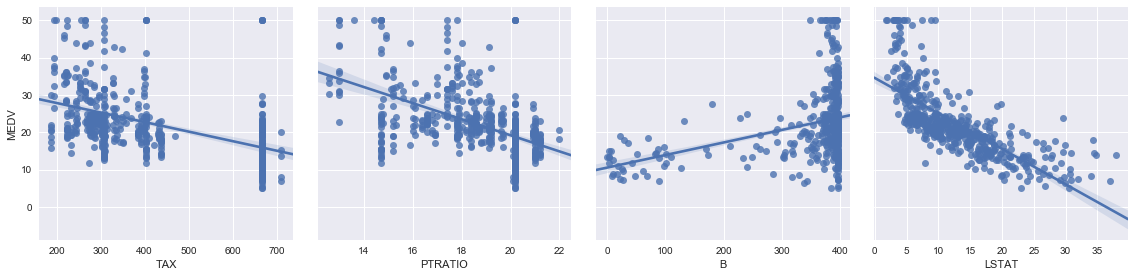

In [9]:
x_vars1 = ['CRIM','ZN','INDUS']
x_vars2 = ['CHAS','NOX','RM']          
x_vars3 = ['AGE','DIS', 'RAD']          
x_vars4 = ['TAX','PTRATIO', 'B', 'LSTAT']          
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars1, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars2, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars3, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars4, y_vars=y_vars, kind="reg", size=4)

After generating the pair plots of the 13 features with 'MEDV', our target variable, we can compare our findings with the heatmap. For example, we can confirm that the three variables with the strongest relation to 'MEDV' are 'LSTAT', 'RM' and 'PTRATIO' from the pair plots, which corresponds to the results that we have observed from the heatmap. Also, from the various pair plots, we can see that there are some other variables that have a moderate correlation to 'MEDV' and they are 'INDUS', 'NOX' and 'TAX'.

We can see that the pair plots generated aligns with our intuition that:
<br>
1) An increase in the value of 'RM' would generally result in the increase of 'MEDV'. <br>
2) An increase in the value of 'LSTAT' would decrease the value of 'MEDV'. <br>
3) An increase in value of 'PTRATIO' would decrease the value of 'MEDV'.

Next, we create the X and y matrices to store the values of 'MEDV' as well as the other features. 

In [10]:
# Creating the matrix
X = data.drop('MEDV', axis = 1)
y = data['MEDV']

Next, we use scikit-learn's train_test_split function to split our data into train set and test set, while taking note to set the seed.

In [11]:
# Splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Step 5: Data Analysis

After splitting the data into the train set and test set, we attempt to apply alogrithms to solve our data problem.

As this is a regression problem, we will apply linear regression. 
We first apply linear regression on the full model (13 features). 

To evaluate the performance of our prediction, we will look at the R-squared value, the adjusted R-squared value, the Mean Square Error (MSE) and the Root Mean Square Error (RMSE).

We will mainly look at the adjusted R-squared value because it is adjusted for the number of predictors in the model. Unlike the R-squared value, the adjusted R-squared increases only if the new feature improves the model more than would be expected by chance.

In [12]:
# Import linear regression function from scikit-learn
from sklearn.linear_model import LinearRegression

# Running linear regression function and fitting it into the model.
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Accuracy of the prediction
r_squared = lm.score(X_test, y_test)
adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Print the r square and adjusted r squared values
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)

# Calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r square:  0.733449214745
adjusted r squared:  0.694072394196
MSE:  20.8692921838
RMSE:  4.5682920423


Next, we put the coefficients of the model into a dataframe to better visualise them. 

In [13]:
coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


After which, we use a scatter plot to view the relationship between the true 'MEDV' against the predicted 'MEDV'. 

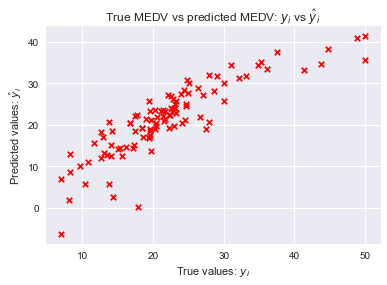

In [14]:
plt.scatter(y_test, y_pred, s=30, c='r', marker='x', linewidths=1)
plt.title("True MEDV vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()

Ideally, the scatter plot should produce a linear line. However, we can see that it is not a perfect fit, which indicates that our model can be further improved on.

To find the features that are significant for our model, we perform feature selection using stepwise regression and Lasso regression.


## Stepwise Regression

Perform a forward-backward feature selection based on p-value from stasmodels.api.OLS
We include a feature if its p-value < 0.01
exclude a feature if its p-value > 0.05


In [15]:
# Stepwise regression 
# Perform a forward-backward feature selection based on p-value from stasmodels.api.OLS
import statsmodels.api as sm


def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    """
    Arguments:
        X - candidate features
        y - target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162
resulting features:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']


We can see that the stepwise regression method proposes a model with the following features:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']

As a result, we will now perform linear regression on our new model, using the same method as above.

In [16]:
# test the new model with ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']
# Create X and y matrix

X_step = data.drop(['MEDV', 'INDUS', 'AGE', 'CRIM', 'RAD', 'TAX'], axis = 1)
y_step = data['MEDV']


# shuffle and split data into train and test set

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size = 0.2, random_state = 5)
print(X_train_step.shape)
print(X_test_step.shape)
print(y_train_step.shape)
print(y_test_step.shape)

(404, 8)
(102, 8)
(404,)
(102,)


Next, we run linear regression again to find the R-square, adjusted R-squared, MSE and RMSE values.

In [18]:
# run linear regression

lm = LinearRegression()
model_step = lm.fit(X_train_step, y_train_step)
y_step_pred = lm.predict(X_test_step)

print("intercept: ", model_step.intercept_)


# Accuracy of the prediction
r_squared = lm.score(X_test_step, y_test_step)
adj_r_squared = 1 - (1-r_squared)*(len(y_test_step)-1)/(len(y_test_step)-X_test_step.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)

# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test_step,y_step_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_step,y_step_pred)))

intercept:  31.0456389421
r square:  0.749017254796
adjusted r squared:  0.72742734123
MSE:  19.6504101
RMSE:  4.43287830873


We again display the coefficients in a dataframe except we only show the coefficients of the 8 features that were proposed from the stepwise regression method.

In [19]:
# Display the coefficients in a dataframe
coefficients_step = pd.DataFrame(model_step.coef_,X_step.columns)
coefficients_step.columns = ['Coefficients']
coefficients_step

,Coefficients
ZN,0.041515
CHAS,3.108909
NOX,-14.240490
RM,3.721872
DIS,-1.382604
PTRATIO,-0.845649
B,0.010953
LSTAT,-0.617675


Now, we can see that there is an improvement in adjusted R-squared value from 0.694072394196 to 0.72742734123. Furthermore, the MSE and RMSE have also decreased.

## Lasso Regression

Lasso regression performs both regularization and feature selection in order to improve the prediction of our model.

L1 regularization adds a penalty α∑ni=1|wi| to the loss function (L1-norm). Since each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus L1 regularization produces sparse solutions, inherently performing feature selection.

The main hyperparameter we need to tune in a LASSO regression is the regularization factor alpha. 

We use GridSearchCV to find the optimal alpha.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_ridge = [1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

coeffs = {}
for alpha in alpha_ridge:
    r = Lasso(alpha=alpha, normalize=True, max_iter=1000000)
    r = r.fit(X_train, y_train)
    
grid_search = GridSearchCV(Lasso(alpha=alpha, normalize=True), scoring='neg_mean_squared_error',
                           param_grid={'alpha': alpha_ridge}, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("alpha: ", grid_search.best_estimator_.alpha)
print(grid_search.score(X_train, y_train))

alpha:  0.001
-22.4968927753


We have obtained an optimal alpha value of 0.001. 
We visualise the root mean squared error across different alpha values.

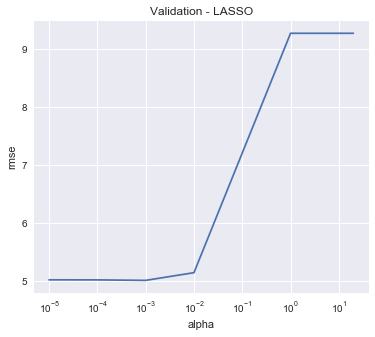

In [21]:
alpha = alpha_ridge
rmse = list(np.sqrt(-grid_search.cv_results_['mean_test_score']))

plt.figure(figsize=(6,5))
lasso_cv = pd.Series(rmse, index = alpha)
lasso_cv.plot(title = "Validation - LASSO", logx=True)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

Having identified that our optimal alpha is 0.001, we can now fit the model to our training data.

In [22]:
lasso = Lasso(alpha=.001, normalize=True, max_iter=1e6)
lasso = lasso.fit(X_train, y_train)

In [23]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables." )

Lasso picked 12 variables.


Next, we want to visualise the coefficients in the Lasso model.

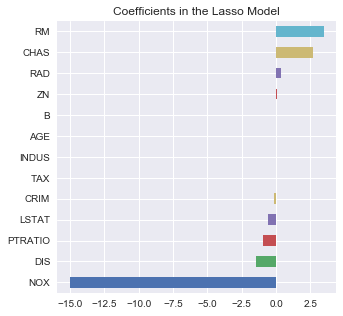

In [24]:
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

We then identify the feature with zero coefficient, which is the feature we will eliminate.

In [25]:
print(coef!=0)

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX         True
RM          True
AGE        False
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
dtype: bool


We see that feature 'AGE' returns False. So we test the new model with the remaining features: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'.

Similar to the steps above, we will now perform linear regression on our new model, using the same method as above.

In [26]:
# Create X and y matrix
X_lasso = data.drop(['MEDV', 'AGE'], axis = 1)
y_lasso = data['MEDV']

# shuffle and split data into train and test set
from sklearn.model_selection import train_test_split
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size = 0.2, random_state = 5)
print(X_train_lasso.shape)
print(X_test_lasso.shape)
print(y_train_lasso.shape)
print(y_test_lasso.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [27]:
# Run linear regression
lm = LinearRegression()
model_lasso = lm.fit(X_train_lasso, y_train_lasso)
y_lasso_pred = lm.predict(X_test_lasso)

# Accuracy of the prediction
r_squared = lm.score(X_test_lasso, y_test_lasso)
adj_r_squared = 1 - (1-r_squared)*(len(y_test_lasso)-1)/(len(y_test_lasso)-X_test_lasso.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)

# Calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test_lasso,y_lasso_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_lasso,y_lasso_pred)))

r square:  0.733447363183
adjusted r squared:  0.697507681815
MSE:  20.8694371497
RMSE:  4.56830790881


The r square, adjusted r squared, MSE and RMSE values show that there is negligible improvement to the performance of the model, in comparison to the full model.

### Step 6: Analysis of Results

We first applied linear regression on the full model (13 features), which yields

r square:  0.733449214745 <br>
adjusted r squared:  0.694072394196 <br>
MSE:  20.8692921838 <br>
RMSE:  4.5682920423 <br>

Using stepwise regression for feature selection based on p-values, we obtained a model (8 features) with 

r square:  0.749017254796 <br>
adjusted r squared:  0.72742734123 <br>
MSE:  19.6504101 <br>
RMSE:  4.43287830873 <br>

which sees an improvement in our performance metrics.

Finally, we applied the Lasso regression, using GridSearch to find the optimal alpha. Using alpha = 0.001, a model with 12 features was proposed. 

r square:  0.733447363183 <br>
adjusted r squared:  0.697507681815 <br>
MSE:  20.8694371497 <br>
RMSE:  4.56830790881 <br>

Unfortunately, there is negligible improvement to the performance of the model. This could be due to the inclusion of features with high correlation to each other, hence multicollinearity is included into the linear regression. For example, both 'RAD' and 'TAX' have a high correlation value (0.91).

In conclusion, we recommend the model with 8 predictor variables. 
The recommended linear regression equation is as follows:

MEDV = 31.0456389421 + 0.041515*ZN + 3.1089*CHAS - 14.2405*NOX + 3.7219*RM - 1.3826*DIS - 0.8456*PTRATIO + 0.010953*B - 0.6177*LSTAT


